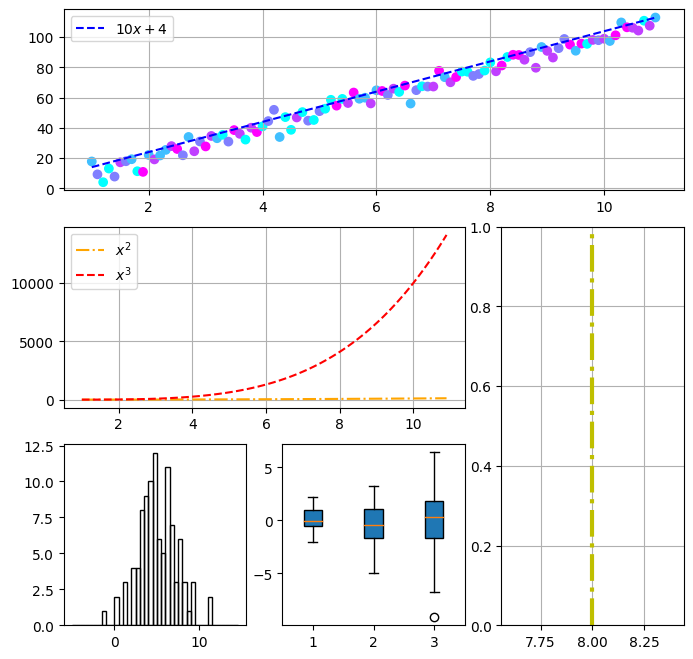

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 11, 0.1)
z = np.random.randint(5,10,100) 

plt.figure(figsize=(8,8))
ax1 = plt.subplot(3,3,(1,3))
y1 = 10 * x + 4* np.random.randn(100)
ax1.scatter(x, y1, c = z, cmap = 'cool')
ax1.plot(x, 10 * x + 4, '--', color = 'blue', label = '$10x + 4$')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(3,3,(4,5))
ax2.plot(x, x**2, '-.', color = 'orange', label = '$x^2$')
ax2.plot(x, x**4, '--', color = 'red', label = '$x^3$')
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot(3,3,7)
y3 = np.random.randn(100)*2 + 5
ax3.hist(y3, bins = np.arange(-5, 15, 0.5), fill=False)

ax4 = plt.subplot(3,3,8)
y4 = [np.random.normal(0, std, 100) for std in range(1, 4)]
plt.boxplot(y4,vert=True,patch_artist=True);  

ax5 = plt.subplot(3,3,(6,9))
ax5.axvline(8, ls='-.', lw=3, c='y')
ax5.grid(True)

axes = [ax1, ax2, ax3, ax4, ax5]
                       

**EJERCICIO 2**

(-0.5, 1410.5, 1423.5, -0.5)

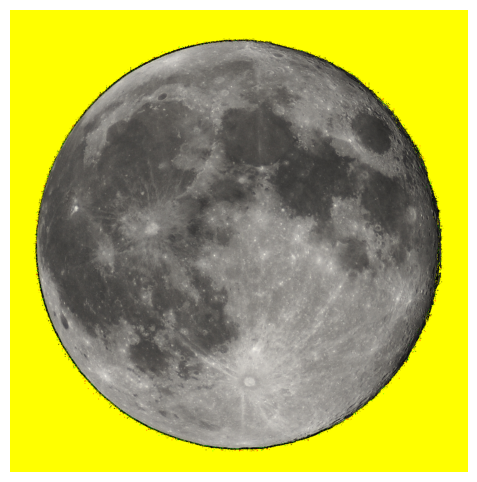

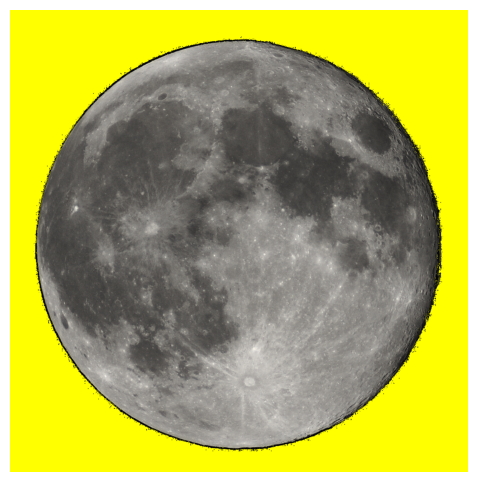

In [43]:
#Librerías necesarias para trabajar con la imagen
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Se abre la imagen y se convierte en una matriz de Numpy. También se obtienen las dimensiones de la matriz.
imagen = Image.open('Full_Moon_Luc_Viatour.jpg') 
im_datos = np.array(imagen)
x, y, z = im_datos.shape

#Método 1: Usando una máscara de Numpy. Se crea una máscara que indica cuando un elemento de la imagen es 
#negro (0,0,0), y se aplica la máscara sustituyendo por color amarillo (255, 255, 0)
mask = im_datos == np.array([0,0,0])
masked_image = np.ma.masked_array(im_datos, mask).filled([255, 255, 0])

#Se grafica la imagen
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(masked_image)
ax.axis(False)

#Método 2: Usando ciclos iterativos. Se recorre cada pixel (x, y) y se verifica que los 3 componentes de color
#sean negros (0,0,0). Luego, se sustituye por amarillo (255, 255, 0)
for i in range (x):
    for j in range (y):
        if im_datos[i][j][0] == 0 and im_datos[i][j][1] == 0 and im_datos[i][j][2] == 0:
            im_datos[i][j] = [255, 255, 0]
            
#Se grafica la imagen
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(im_datos)
ax.axis(False)


**Ejercicio 3**

Colocar en 0 todos los valores de Rojo en la imagen Full_Moon_Luc_Viatour.jpg, luego el verde y luego el azul.

(-0.5, 1410.5, 1423.5, -0.5)

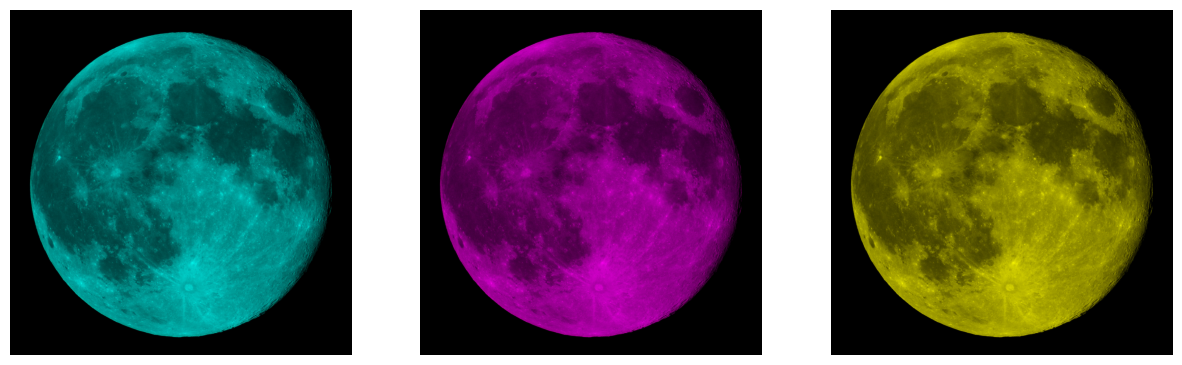

In [44]:
#Librerías necesarias para trabajar con la imagen
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Se abre la imagen y se convierte en una matriz de Numpy. También se obtienen las dimensiones de la matriz.
imagen = Image.open('Full_Moon_Luc_Viatour.jpg') 
im_datos = np.array(imagen)
x, y, z = im_datos.shape

im_nored = np.array(imagen)
im_nogreen = np.array(imagen)
im_noblue = np.array(imagen)
#Se itera sobre cada dimensión de la imagen y se pone a cero el canal cero (rojo)
for i in range (x):
    for j in range (y):
        im_nored[i][j][0] = 0
        im_nogreen[i][j][1] = 0
        im_noblue[i][j][2] = 0
                        
#Se grafica la imagen
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(im_nored)
ax1.axis(False)
ax2.imshow(im_nogreen)
ax2.axis(False)
ax3.imshow(im_noblue)
ax3.axis(False)



**Ejercicio 4**

Leer una imagen como un arreglo de grises y transformarlo a escala de grises

(-0.5, 599.5, 399.5, -0.5)

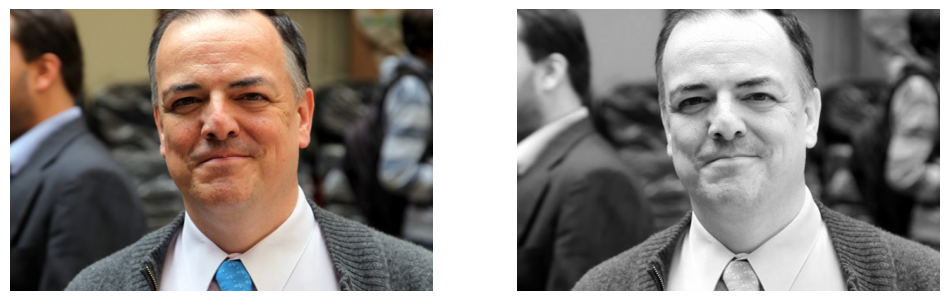

In [45]:
#Librerías necesarias para trabajar con la imagen
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Se abre la imagen y se convierte en una matriz de Numpy. También se obtienen las dimensiones de la matriz.
imagen = Image.open('alejandro-gil-villegas-universidad-guanajuato-ug.jpg') 
im_datos = np.array(imagen)
x, y, z = im_datos.shape

im_greyscale = np.array(imagen)
#Se itera sobre cada dimensión de la imagen y se pone a cero el canal cero (rojo)
for i in range (x):
    for j in range (y):
        maximum = im_greyscale[i][j].argmax()
        for k in range(z):
            if not k == maximum:
                im_greyscale[i][j][k] = im_greyscale[i][j][maximum]
        
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(12,12))
ax1.imshow(im_datos)
ax1.axis(False)
ax2.imshow(im_greyscale)
ax2.axis(False)

**Ejercicio 5**

Agregar un filtro desde scipy.ndimage

(-0.5, 599.5, 399.5, -0.5)

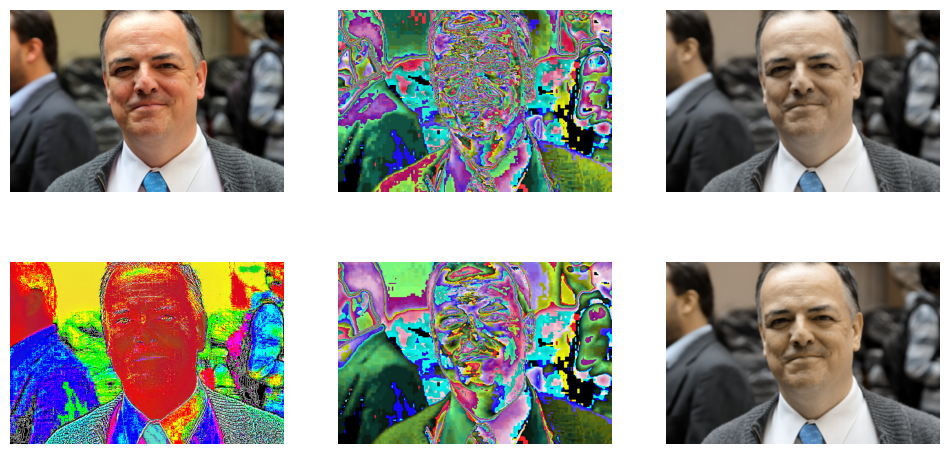

In [59]:
#Librerías necesarias para trabajar con la imagen
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

#Se abre la imagen y se convierte en una matriz de Numpy. También se obtienen las dimensiones de la matriz.
imagen = Image.open('alejandro-gil-villegas-universidad-guanajuato-ug.jpg') 
im_datos = np.array(imagen)

#Se aplican 5 filtros
im_sobel = ndimage.sobel(im_datos)
im_gaussian = ndimage.gaussian_filter(im_datos, 1)
im_laplace = ndimage.laplace(im_datos)
im_prewitt = ndimage.prewitt(im_datos)
im_uniform = ndimage.uniform_filter(im_datos)

#Se muestra la imagen con cada filtro
fig, ax= plt.subplots(2, 3, figsize=(12,6))
ax[0][0].imshow(im_datos)
ax[0][0].axis(False)
ax[0][1].imshow(im_sobel)
ax[0][1].axis(False)
ax[0][2].imshow(im_gaussian)
ax[0][2].axis(False)
ax[1][0].imshow(im_laplace)
ax[1][0].axis(False)
ax[1][1].imshow(im_prewitt)
ax[1][1].axis(False)
ax[1][2].imshow(im_uniform)
ax[1][2].axis(False)